In [2]:
#Import libraries &Read file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams

In [3]:
os.chdir("C:\\Users\\sowmy\\Downloads")

In [4]:
Airline_DB=pd.read_excel("Flight Data Set.xlsx")

In [5]:
Airline_DB.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [6]:
#Check Columns
Airline_DB.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#Check Data Types
Airline_DB.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
#Check Null Values
Airline_DB.dtypes.isna().sum()

0

In [9]:
#Check if duplicates
Airline_DB.duplicated().sum()

220

In [10]:
#Remove Duplicates
Airline_DB=Airline_DB.drop_duplicates()

In [11]:
Airline_DB

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [12]:
#Recheck to ensure Duplicates are removed
Airline_DB.duplicated().sum()

0

In [13]:
Airline_DB.shape

(10463, 11)

In [14]:
Airline_DB.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
import seaborn as sns


In [16]:
#Lets carry out Basic Analysis on Airlines and Flights

In [17]:
Total_Flights=Airline_DB['Airline'].value_counts()

In [18]:
Total_Flights

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [19]:
#Find out Total Flights operating and Respective Airlines(Market share of Distinct Airlines)

In [27]:
rcParams['figure.figsize']=(20,6)

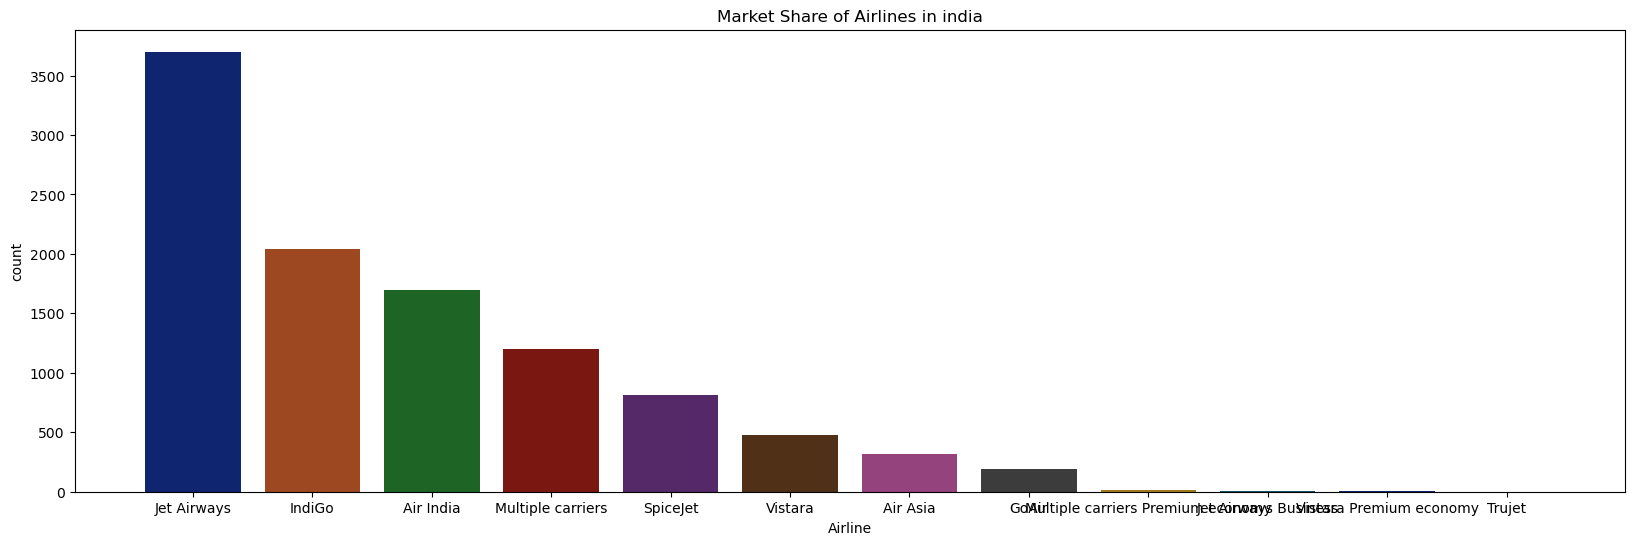

In [28]:
rcParams['figure.figsize']
sns.barplot(y=Total_Flights,x=Total_Flights.index,palette='dark')
plt.title("Market Share of Airlines in india")
plt.plot()
plt.show()

In [23]:
#Lets find out Total Routes Scheduled and run by Airlines(DEmand for top 10 Distinct Routes)

In [24]:
Total_Routes=Airline_DB['Route'].value_counts()[:10]

In [25]:
Total_Routes

Route
DEL → BOM → COK    2376
BLR → DEL          1536
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
DEL → HYD → COK     326
DEL → BLR → COK     232
Name: count, dtype: int64

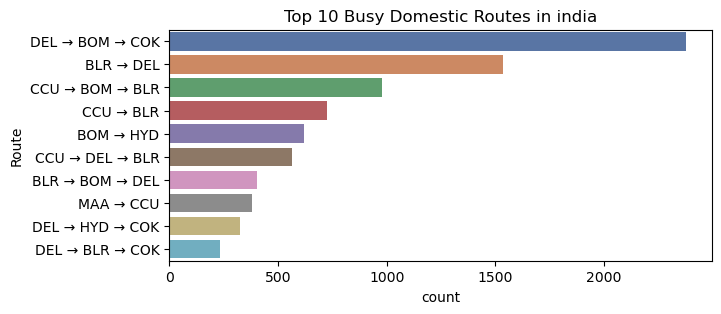

In [473]:
sns.barplot(x=Total_Routes,y=Total_Routes.index,palette='deep')
plt.title("Top 10 Busy Domestic Routes in india")
plt.show()

In [27]:
#Analyse Busy Source Airports

In [28]:
Source=Airline_DB['Source'].value_counts()

In [29]:
Source

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

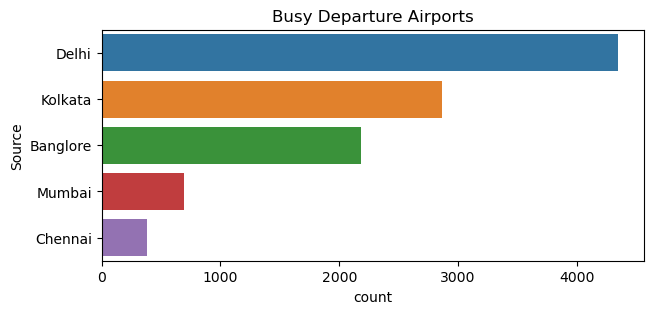

In [206]:
rcParams['figure.figsize']=(7,3)
sns.barplot(x=Source,y=Source.index)
plt.title("Busy Departure Airports")
plt.show()

In [31]:
#Analyse Busy Destinations

In [32]:
Destination=Airline_DB['Destination'].value_counts()

In [33]:
Destination

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

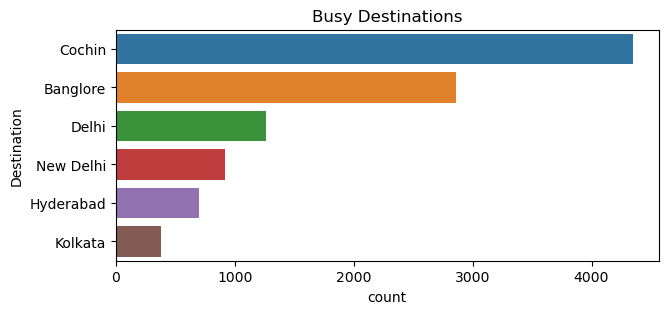

In [472]:
rcParams['figure.figsize']=(7,3)
sns.barplot(x=Destination,y=Destination.index)
plt.title("Busy Destinations")
plt.show()

In [469]:
Based_on_Amenities=Airline_DB.groupby('Additional_Info')['Price'].mean()
Based_on_Amenities=Based_on_Amenities.sort_values(ascending=False)

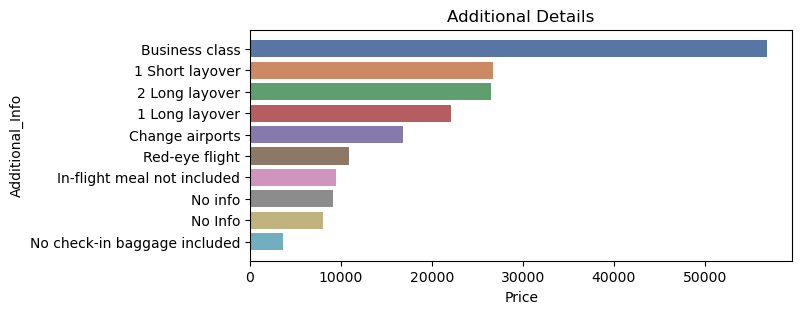

In [475]:
sns.barplot(y=Based_on_Amenities.index,x=Based_on_Amenities,palette='deep')
plt.title("Additional Details")
plt.plot()
plt.show()

In [35]:
#Check Average Price of airline and plot Barplot

In [36]:
Average_Price=Airline_DB.groupby('Airline')['Price'].mean()
Average_Price=Average_Price.sort_values(ascending=False)

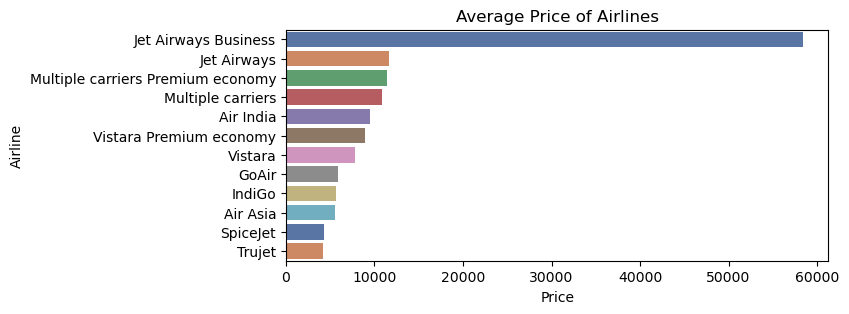

In [208]:
sns.barplot(y=Average_Price.index,x=Average_Price,palette='deep')
plt.title("Average Price of Airlines")
plt.show()

In [39]:
#Check Average Price by   Routee and plot Barplot

In [214]:
Average_Price_ByRoute=Airline_DB.groupby('Route')['Price'].mean()[:20]
Average_Price_ByRoute=Average_Price_ByRoute.sort_values(ascending=False)

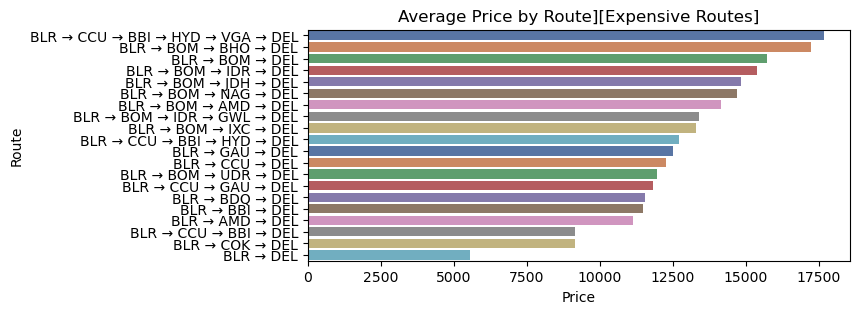

In [216]:
sns.barplot(y=Average_Price_ByRoute.index,x=Average_Price_ByRoute,palette='deep')
plt.title("Average Price by Route][Expensive Routes]")
plt.show()

In [42]:
#Check if Price Varies by Total Stops

In [43]:
Average_Price_ByStops=Airline_DB.groupby('Total_Stops')['Price'].mean()
Average_Price_ByStops=Average_Price_ByStops.sort_values(ascending=False)[:10]

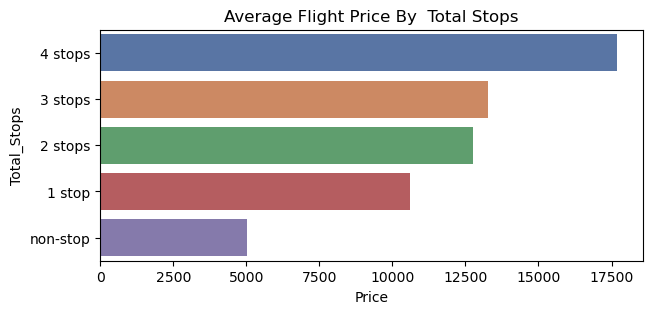

In [438]:
sns.barplot(y=Average_Price_ByStops.index,x=Average_Price_ByStops,palette='deep')
plt.title("Average Flight Price By  Total Stops")
plt.show()

In [46]:
Total_Stops=Airline_DB['Total_Stops'].value_counts()

In [47]:
Total_Stops

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

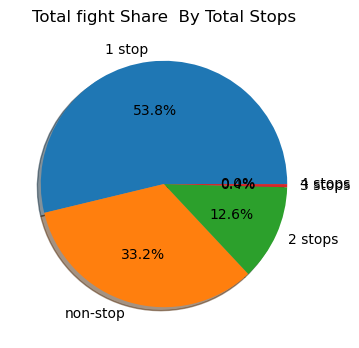

In [226]:
rcParams['figure.figsize']=(4,4)
plt.pie(x=Total_Stops,labels=Total_Stops.index,shadow=True,autopct=('%1.1f%%'))
plt.title("Total fight Share  By Total Stops")
plt.show()

In [49]:
#Draw a Donut chart to Analyse Market Share of each Airline

In [50]:
Market_Share=Airline_DB['Airline'].value_counts()

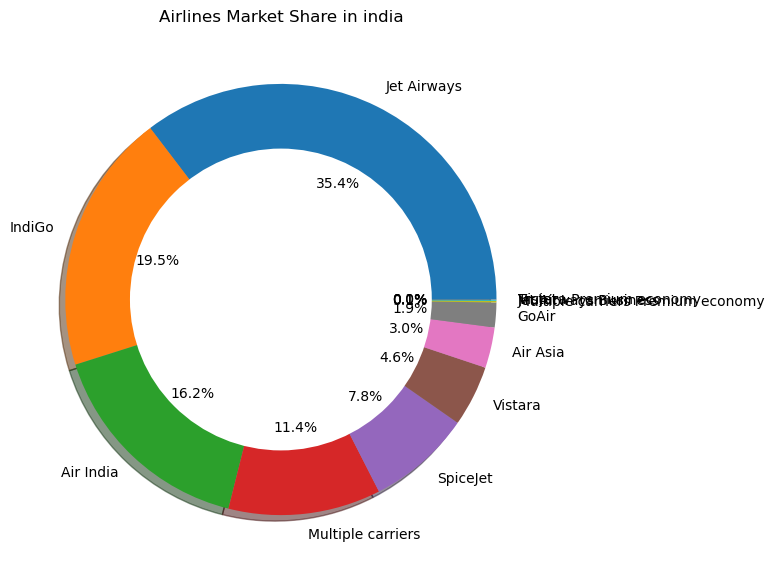

In [440]:
rcParams['figure.figsize']=(7,7)
plt.pie(x=Market_Share,labels=Market_Share.index,shadow=True,autopct=('%1.1f%%'))
Innercircle=plt.Circle((0,0),.7,fc='w')
plt.gca().add_artist(Innercircle)
plt.title("Airlines Market Share in india")
plt.show()
plt.show()

In [52]:
#Lest perform Trend Analysis based on Time.Initially extract Day,Month,QQuarter

In [53]:
Airline_DB=Airline_DB.sort_values(['Date_of_Journey'],ascending=True)

In [54]:
Airline_DB['Date_of_Journey']=pd.to_datetime(Airline_DB['Date_of_Journey'],dayfirst=True)

In [55]:
Airline_DB['Journey Date']=Airline_DB['Date_of_Journey'].dt.day

In [56]:
Airline_DB['Journey Month']=Airline_DB['Date_of_Journey'].dt.month

In [57]:
Airline_DB['Quarter']=Airline_DB['Date_of_Journey'].dt.quarter

In [58]:
Airline_DB['Arrival_Time']=pd.to_datetime(Airline_DB['Arrival_Time'])

C:\Users\sowmy\AppData\Local\Temp\ipykernel_11268\2321759346.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Airline_DB['Arrival_Time']=pd.to_datetime(Airline_DB['Arrival_Time'])


In [59]:
Airline_DB['Arrival_Hour']=Airline_DB['Arrival_Time'].dt.hour

In [60]:
Airline_DB['Arrival_Minute']=Airline_DB['Arrival_Time'].dt.minute

In [61]:
Airline_DB['Dep_Time']=pd.to_datetime(Airline_DB['Dep_Time'])

C:\Users\sowmy\AppData\Local\Temp\ipykernel_11268\1708723878.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Airline_DB['Dep_Time']=pd.to_datetime(Airline_DB['Dep_Time'])


In [62]:
Airline_DB['Dep_Hour']=Airline_DB['Dep_Time'].dt.hour

In [63]:
Airline_DB['Dep_Minute']=Airline_DB['Dep_Time'].dt.minute

In [64]:
Airline_DB.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Quarter,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
6526,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-07-07 07:00:00,2024-07-07 09:40:00,2h 40m,non-stop,No info,21520,1,3,1,9,40,7,0
6321,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → AMD → DEL,2024-07-07 08:50:00,2024-03-02 23:55:00,39h 5m,2 stops,No info,17135,1,3,1,23,55,8,50


In [65]:
Airline_DB['Duration']

6526     2h 40m
6321     39h 5m
2079        20h
6314    23h 45m
2405    17h 35m
         ...   
7060     7h 15m
7054     2h 50m
2748     21h 5m
4611     8h 30m
5238    10h 40m
Name: Duration, Length: 10463, dtype: object

In [66]:
Month=Airline_DB.groupby('Journey Month')['Price'].mean()

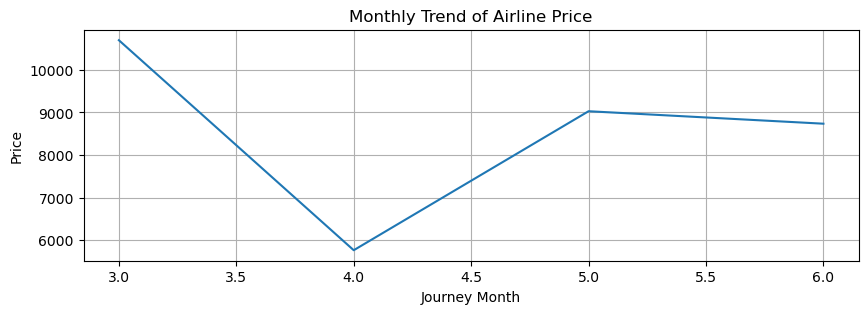

In [441]:
rcParams['figure.figsize']=(10,3)
sns.lineplot(x=Month.index,y=Month)
plt.title("Monthly Trend of Airline Price")
plt.grid('k')
plt.show()

In [68]:
#Groupby Based on Daily Price and plot 

In [69]:
Daily=Airline_DB.groupby('Journey Date')['Price'].mean()

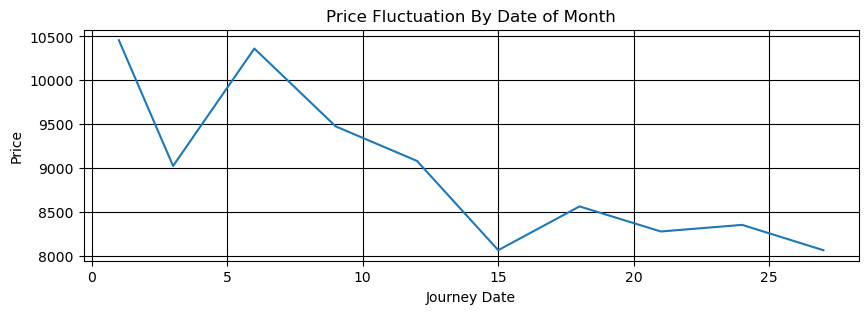

In [232]:
rcParams['figure.figsize']=(10,3)
sns.lineplot(x=Daily.index,y=Daily)
plt.grid(color='k')
plt.title("Price Fluctuation By Date of Month")
plt.show()

In [71]:
#Groupby Quarterly aand Plot

In [72]:
Quartely=Airline_DB.groupby('Quarter')['Price'].mean()

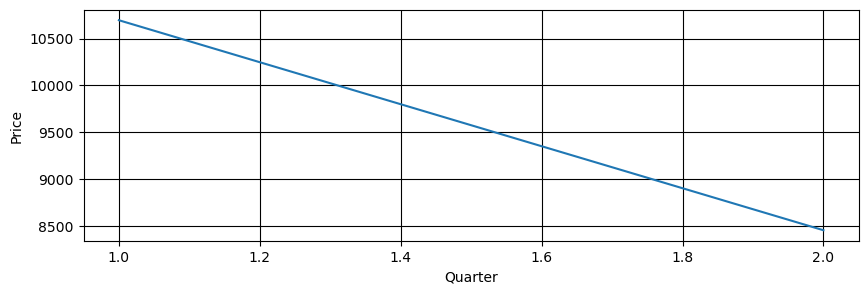

In [73]:
rcParams['figure.figsize']=(10,3)
sns.lineplot(x=Quartely.index,y=Quartely)
plt.grid(color='k')
plt.show()

In [74]:
#Groupby Based on Hour Price and plot 

In [75]:
Hourly=Airline_DB.groupby('Dep_Hour')['Price'].mean()

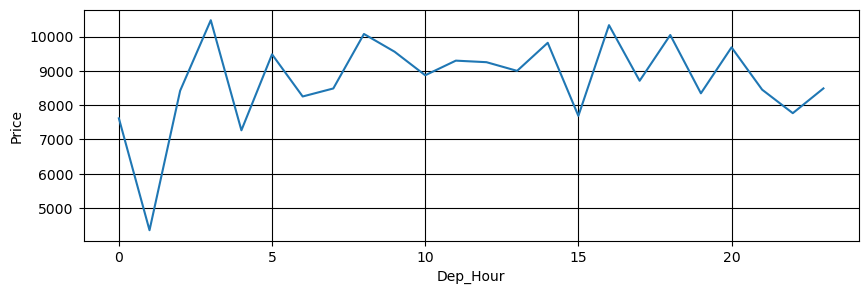

In [76]:
rcParams['figure.figsize']=(10,3)
sns.lineplot(x=Hourly.index,y=Hourly)
plt.grid(color='k')
plt.show()

In [77]:
Airline_DB['Duration']

6526     2h 40m
6321     39h 5m
2079        20h
6314    23h 45m
2405    17h 35m
         ...   
7060     7h 15m
7054     2h 50m
2748     21h 5m
4611     8h 30m
5238    10h 40m
Name: Duration, Length: 10463, dtype: object

In [78]:
Airline_DB1=Airline_DB['Duration'].str.split(' ',expand=True)

In [79]:
Airline_DB1

,0,1
6526,2h,40m
6321,39h,5m
2079,20h,None
6314,23h,45m
2405,17h,35m
...,...,...
7060,7h,15m
7054,2h,50m
2748,21h,5m
4611,8h,30m


In [80]:
Airline_DB_Hours=Airline_DB1[0].apply(lambda x:x.replace('h',''))

In [81]:
Airline_DB_Hours

6526     2
6321    39
2079    20
6314    23
2405    17
        ..
7060     7
7054     2
2748    21
4611     8
5238    10
Name: 0, Length: 10463, dtype: object

In [82]:
Airline_DB['Duration_Hours']=Airline_DB_Hours

In [83]:
Airline_DB1[1].fillna('00m',inplace=True)

In [84]:
Airline_DB_Minutes=Airline_DB1[1].apply(lambda x:x.replace('m',''))

In [85]:
Airline_DB_Minutes

6526    40
6321     5
2079    00
6314    45
2405    35
        ..
7060    15
7054    50
2748     5
4611    30
5238    40
Name: 1, Length: 10463, dtype: object

In [86]:
Airline_DB['Duration_Minutes']=Airline_DB_Minutes

In [87]:
Airline_DB=Airline_DB.drop(['Dep_Time','Arrival_Time','Duration','Quarter'],axis=1)

In [443]:
Airline_DB.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hours,Duration_Minutes
6526,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,non-stop,No info,21520,1,3,9,40,7,0,2,40
6321,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → AMD → DEL,2 stops,No info,17135,1,3,23,55,8,50,39,5
2079,Air India,2019-03-01,Banglore,New Delhi,BLR → AMD → DEL,1 stop,1 Long layover,14752,1,3,20,30,0,30,20,00
6314,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,25735,1,3,11,25,11,40,23,45
2405,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,1 stop,1 Long layover,22270,1,3,7,40,14,5,17,35


In [89]:
Price_By_Duration=Airline_DB.groupby('Duration_Hours')['Price'].mean()

In [90]:
Price_By_Duration=Price_By_Duration.sort_values()

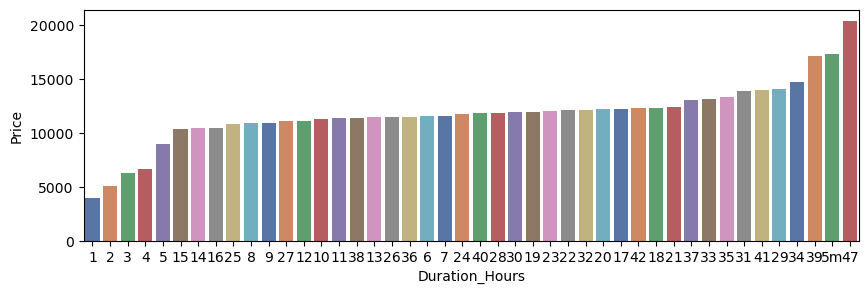

In [91]:
sns.barplot(x=Price_By_Duration.index,y=Price_By_Duration,palette='deep')
plt.show()

<Axes: xlabel='Duration_Hours', ylabel='count'>

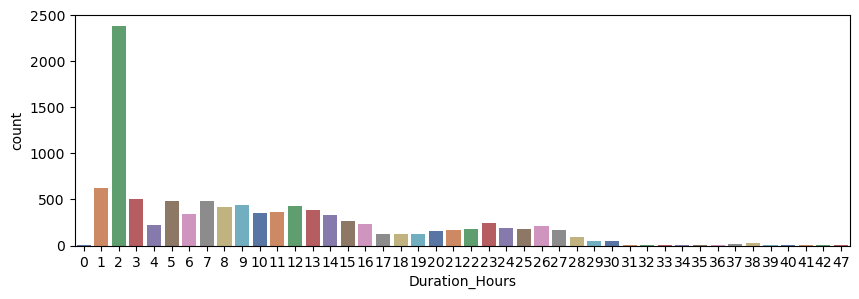

In [234]:
sns.countplot(x=Airline_DB['Duration_Hours'].sort_values(ascending=False),palette='deep')

In [235]:
#Now remove all unwanted columns and convert categorial Data into Binary form By Label Encoding and Get Dummies Method

In [236]:
Airline_DB['Duration_Hours'].unique()

array([ 2, 39, 20, 23, 17, 11, 21, 13,  6,  7, 26, 12, 10,  8, 28, 14,  4,
       16,  9, 18, 22, 25, 15,  5, 19, 24, 38, 27, 30, 29,  3, 40, 35, 31,
        1, 34, 37, 33, 36, 32, 42, 41, 47,  0])

In [237]:
Airline_DB.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hours,Duration_Minutes
6526,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,non-stop,No info,21520,1,3,9,40,7,0,2,40
6321,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → AMD → DEL,2 stops,No info,17135,1,3,23,55,8,50,39,5


In [238]:
Airline_DB['Duration_Hours']=Airline_DB['Duration_Hours'].replace('5m','0')

In [239]:
Airline_DB['Duration_Hours'].unique()

array([ 2, 39, 20, 23, 17, 11, 21, 13,  6,  7, 26, 12, 10,  8, 28, 14,  4,
       16,  9, 18, 22, 25, 15,  5, 19, 24, 38, 27, 30, 29,  3, 40, 35, 31,
        1, 34, 37, 33, 36, 32, 42, 41, 47,  0])

In [240]:
Airline_DB['Duration_Hours']=Airline_DB['Duration_Hours'].astype('int')

In [241]:
X_Dummies=Airline_DB.select_dtypes(include='object').columns

In [242]:
X_Dummies

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Duration_Minutes'],
      dtype='object')

In [243]:
Air_DUM=pd.get_dummies(data=Airline_DB,columns=X_Dummies,dtype=int)

In [244]:
Air_DUM=Air_DUM.drop(['Date_of_Journey'],axis=1)

In [245]:
y=Air_DUM.iloc[:,0]

In [246]:
y

6526    21520
6321    17135
2079    14752
6314    25735
2405    22270
        ...  
7060     9946
7054     4668
2748    14571
4611    10844
5238     8372
Name: Price, Length: 10463, dtype: int64

In [348]:
x=Air_DUM.iloc[:,1:]

In [349]:
x

,Journey Date,Journey Month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hours,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Duration_Minutes_15,Duration_Minutes_20,Duration_Minutes_25,Duration_Minutes_30,Duration_Minutes_35,Duration_Minutes_40,Duration_Minutes_45,Duration_Minutes_5,Duration_Minutes_50,Duration_Minutes_55
6526,1,3,9,40,7,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6321,1,3,23,55,8,50,39,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2079,1,3,20,30,0,30,20,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6314,1,3,11,25,11,40,23,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2405,1,3,7,40,14,5,17,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,9,6,18,30,11,15,7,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7054,9,6,12,35,9,45,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2748,9,6,18,15,21,10,21,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4611,9,6,22,35,14,5,8,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [350]:
x.columns

Index(['Journey Date', 'Journey Month', 'Arrival_Hour', 'Arrival_Minute',
       'Dep_Hour', 'Dep_Minute', 'Duration_Hours', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir',
       ...
       'Duration_Minutes_15', 'Duration_Minutes_20', 'Duration_Minutes_25',
       'Duration_Minutes_30', 'Duration_Minutes_35', 'Duration_Minutes_40',
       'Duration_Minutes_45', 'Duration_Minutes_5', 'Duration_Minutes_50',
       'Duration_Minutes_55'],
      dtype='object', length=185)

In [351]:
y

6526    21520
6321    17135
2079    14752
6314    25735
2405    22270
        ...  
7060     9946
7054     4668
2748    14571
4611    10844
5238     8372
Name: Price, Length: 10463, dtype: int64

In [352]:
from sklearn.preprocessing import normalize

In [353]:
x_nor=normalize(x)

In [354]:
x_nor

array([[0.02389775, 0.07169324, 0.21507971, ..., 0.        , 0.        ,
        0.        ],
       [0.01142876, 0.03428627, 0.26286143, ..., 0.01142876, 0.        ,
        0.        ],
       [0.01954781, 0.05864343, 0.39095623, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22122974, 0.14748649, 0.44245948, ..., 0.02458108, 0.        ,
        0.        ],
       [0.19555978, 0.13037318, 0.47803501, ..., 0.        , 0.        ,
        0.        ],
       [0.18709442, 0.12472961, 0.14551788, ..., 0.        , 0.        ,
        0.        ]])

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x,y)

In [357]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_Train,Y_Train)

LinearRegression()

In [358]:
Y_Pred=LR.predict(X_Test)

In [359]:
from sklearn.metrics import r2_score

In [360]:
r2_score(Y_Pred,Y_Test)

-0.0022928202323850844

In [361]:
#Linear Regression poorly performs for this case.Lets try othrt reression models

In [362]:
#Try Random Forest Classifier

In [363]:
from sklearn.ensemble import RandomForestRegressor

In [364]:
RFC=RandomForestRegressor()
RFC.fit(X_Train,Y_Train)

RandomForestRegressor()

In [365]:
y_pred1=RFC.predict(X_Test)

In [366]:
r2_score(y_pred1,Y_Test)

0.8051294946270601

In [367]:
#RFR Performs a better role with 80.5 percent Accuracy.Lets Try other Models to get better accuracy

In [368]:
#Try extratree regressor

In [369]:
from sklearn.ensemble import ExtraTreesRegressor
ETC=ExtraTreesRegressor()
ETC.fit(X_Train,Y_Train)
y_pred2=ETC.predict(X_Test)

In [370]:
r2_score(y_pred2,Y_Test)

0.8445687124689781

In [ ]:
#Try Decision Tree Regtressor

In [371]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_Train,Y_Train)
y_pred3=DTR.predict(X_Test)

In [372]:
r2_score(y_pred3,Y_Test)

0.7566102998894146

In [ ]:
#Try CatBoosRegressor

In [373]:
from catboost import CatBoostRegressor
CBR=CatBoostRegressor(learning_rate=1, n_estimators=700, subsample=1.0, max_depth=3)
CBR.fit(X_Train,Y_Train)
Y_PRED4=CBR.predict(X_Test)

0:	learn: 3139.3647379	total: 2.6ms	remaining: 1.81s
1:	learn: 2660.0192746	total: 5.54ms	remaining: 1.93s
2:	learn: 2450.2197935	total: 8.04ms	remaining: 1.87s
3:	learn: 2358.5463049	total: 9.99ms	remaining: 1.74s
4:	learn: 2276.7140571	total: 12.6ms	remaining: 1.76s
5:	learn: 2240.9942265	total: 14.9ms	remaining: 1.73s
6:	learn: 2214.3815769	total: 16.7ms	remaining: 1.65s
7:	learn: 2189.9878072	total: 18.5ms	remaining: 1.6s
8:	learn: 2165.9800953	total: 20.3ms	remaining: 1.55s
9:	learn: 2139.4803143	total: 22ms	remaining: 1.52s
10:	learn: 2116.2103903	total: 23.9ms	remaining: 1.49s
11:	learn: 2098.4040338	total: 25.5ms	remaining: 1.46s
12:	learn: 2082.7159783	total: 27.3ms	remaining: 1.44s
13:	learn: 2074.2466972	total: 28.8ms	remaining: 1.41s
14:	learn: 2057.5393875	total: 30.5ms	remaining: 1.39s
15:	learn: 2038.8400247	total: 32.2ms	remaining: 1.38s
16:	learn: 2025.7807936	total: 33.8ms	remaining: 1.36s
17:	learn: 1925.3250901	total: 35.6ms	remaining: 1.35s
18:	learn: 1914.2464382	

196:	learn: 1216.5708570	total: 377ms	remaining: 962ms
197:	learn: 1216.4650599	total: 380ms	remaining: 962ms
198:	learn: 1213.9661636	total: 382ms	remaining: 961ms
199:	learn: 1213.7960022	total: 383ms	remaining: 959ms
200:	learn: 1212.3136261	total: 386ms	remaining: 957ms
201:	learn: 1210.4898209	total: 387ms	remaining: 955ms
202:	learn: 1208.2181743	total: 389ms	remaining: 953ms
203:	learn: 1206.5428176	total: 391ms	remaining: 951ms
204:	learn: 1205.0374566	total: 393ms	remaining: 949ms
205:	learn: 1203.4483371	total: 395ms	remaining: 947ms
206:	learn: 1201.9275620	total: 397ms	remaining: 946ms
207:	learn: 1200.2621148	total: 399ms	remaining: 944ms
208:	learn: 1200.0102124	total: 401ms	remaining: 943ms
209:	learn: 1199.1578788	total: 404ms	remaining: 942ms
210:	learn: 1198.4714594	total: 406ms	remaining: 941ms
211:	learn: 1196.8428684	total: 408ms	remaining: 939ms
212:	learn: 1196.3295753	total: 410ms	remaining: 938ms
213:	learn: 1195.2305716	total: 412ms	remaining: 935ms
214:	learn

394:	learn: 1058.3660035	total: 737ms	remaining: 569ms
395:	learn: 1057.1168694	total: 740ms	remaining: 568ms
396:	learn: 1056.5355657	total: 742ms	remaining: 566ms
397:	learn: 1056.0275440	total: 744ms	remaining: 565ms
398:	learn: 1054.9301999	total: 747ms	remaining: 563ms
399:	learn: 1054.4615165	total: 749ms	remaining: 562ms
400:	learn: 1054.2408162	total: 753ms	remaining: 562ms
401:	learn: 1053.7080229	total: 756ms	remaining: 560ms
402:	learn: 1053.1114091	total: 758ms	remaining: 559ms
403:	learn: 1052.3869267	total: 761ms	remaining: 557ms
404:	learn: 1052.2428939	total: 764ms	remaining: 556ms
405:	learn: 1051.9614703	total: 766ms	remaining: 555ms
406:	learn: 1051.6695604	total: 769ms	remaining: 554ms
407:	learn: 1046.6053178	total: 771ms	remaining: 552ms
408:	learn: 1045.9412148	total: 773ms	remaining: 550ms
409:	learn: 1045.3682430	total: 775ms	remaining: 548ms
410:	learn: 1044.0376054	total: 777ms	remaining: 547ms
411:	learn: 1043.2724254	total: 779ms	remaining: 545ms
412:	learn

577:	learn: 967.3917426	total: 1.1s	remaining: 232ms
578:	learn: 967.3773443	total: 1.1s	remaining: 231ms
579:	learn: 966.3808118	total: 1.11s	remaining: 229ms
580:	learn: 966.0956417	total: 1.11s	remaining: 227ms
581:	learn: 966.0774827	total: 1.11s	remaining: 225ms
582:	learn: 965.8396164	total: 1.11s	remaining: 223ms
583:	learn: 965.2510381	total: 1.11s	remaining: 221ms
584:	learn: 965.1590390	total: 1.12s	remaining: 219ms
585:	learn: 964.9757851	total: 1.12s	remaining: 218ms
586:	learn: 964.8179260	total: 1.12s	remaining: 216ms
587:	learn: 964.6562576	total: 1.12s	remaining: 214ms
588:	learn: 964.4051965	total: 1.13s	remaining: 212ms
589:	learn: 964.2844934	total: 1.13s	remaining: 210ms
590:	learn: 964.2759095	total: 1.13s	remaining: 208ms
591:	learn: 963.9319156	total: 1.13s	remaining: 206ms
592:	learn: 963.3348145	total: 1.13s	remaining: 204ms
593:	learn: 963.1056784	total: 1.13s	remaining: 203ms
594:	learn: 962.8497722	total: 1.14s	remaining: 201ms
595:	learn: 962.6753301	total:

In [374]:
r2_score(Y_PRED4,Y_Test)

0.8567261268360948

In [ ]:
#Since we are Getting a better accuracy with CatBoost Model Finslise Cat Boost and Apply Croos validtion score to check consistency

In [476]:
from sklearn.model_selection import cross_val_score
cross_val_score(CBR,X_Train,Y_Train,cv=10)

0:	learn: 3190.3309990	total: 1.88ms	remaining: 1.31s
1:	learn: 2783.6802511	total: 4.03ms	remaining: 1.41s
2:	learn: 2622.7821712	total: 5.82ms	remaining: 1.35s
3:	learn: 2513.6602072	total: 8.36ms	remaining: 1.46s
4:	learn: 2404.9850016	total: 10.2ms	remaining: 1.42s
5:	learn: 2322.4255271	total: 11.8ms	remaining: 1.36s
6:	learn: 2262.8362227	total: 13.9ms	remaining: 1.38s
7:	learn: 2236.2440917	total: 15.6ms	remaining: 1.34s
8:	learn: 2199.3011783	total: 17.2ms	remaining: 1.32s
9:	learn: 2100.3631327	total: 18.7ms	remaining: 1.29s
10:	learn: 2074.8536961	total: 20.3ms	remaining: 1.27s
11:	learn: 2052.2508129	total: 22.1ms	remaining: 1.27s
12:	learn: 2032.3423813	total: 23.8ms	remaining: 1.26s
13:	learn: 1997.4696292	total: 25.3ms	remaining: 1.24s
14:	learn: 1977.4743632	total: 27.4ms	remaining: 1.25s
15:	learn: 1961.6237281	total: 28.9ms	remaining: 1.24s
16:	learn: 1931.6211054	total: 30.5ms	remaining: 1.23s
17:	learn: 1916.4817498	total: 32.2ms	remaining: 1.22s
18:	learn: 1897.4122

185:	learn: 1213.3914311	total: 362ms	remaining: 999ms
186:	learn: 1211.2394036	total: 366ms	remaining: 1s
187:	learn: 1210.4140460	total: 368ms	remaining: 1s
188:	learn: 1208.5156012	total: 371ms	remaining: 1s
189:	learn: 1206.1888353	total: 375ms	remaining: 1s
190:	learn: 1202.5428030	total: 378ms	remaining: 1.01s
191:	learn: 1200.3660657	total: 382ms	remaining: 1.01s
192:	learn: 1198.6874499	total: 385ms	remaining: 1.01s
193:	learn: 1195.8707553	total: 388ms	remaining: 1.01s
194:	learn: 1195.1218076	total: 391ms	remaining: 1.01s
195:	learn: 1193.7416981	total: 394ms	remaining: 1.01s
196:	learn: 1192.1026172	total: 396ms	remaining: 1.01s
197:	learn: 1192.0062873	total: 399ms	remaining: 1.01s
198:	learn: 1190.8083535	total: 402ms	remaining: 1.01s
199:	learn: 1190.2048787	total: 404ms	remaining: 1.01s
200:	learn: 1188.4188550	total: 407ms	remaining: 1.01s
201:	learn: 1188.2618152	total: 409ms	remaining: 1.01s
202:	learn: 1188.1221811	total: 411ms	remaining: 1.01s
203:	learn: 1187.19533

361:	learn: 1027.5082786	total: 734ms	remaining: 685ms
362:	learn: 1027.0030052	total: 737ms	remaining: 684ms
363:	learn: 1025.9587110	total: 739ms	remaining: 682ms
364:	learn: 1024.8411968	total: 741ms	remaining: 680ms
365:	learn: 1022.7860059	total: 744ms	remaining: 679ms
366:	learn: 1022.2306660	total: 746ms	remaining: 677ms
367:	learn: 1022.0372480	total: 749ms	remaining: 675ms
368:	learn: 1021.4488848	total: 778ms	remaining: 698ms
369:	learn: 1020.7094472	total: 781ms	remaining: 697ms
370:	learn: 1020.3571660	total: 785ms	remaining: 696ms
371:	learn: 1019.8775513	total: 788ms	remaining: 694ms
372:	learn: 1019.2855030	total: 790ms	remaining: 693ms
373:	learn: 1017.8426215	total: 793ms	remaining: 691ms
374:	learn: 1017.4045008	total: 796ms	remaining: 690ms
375:	learn: 1016.7976351	total: 798ms	remaining: 688ms
376:	learn: 1016.0118306	total: 800ms	remaining: 686ms
377:	learn: 1015.7087579	total: 803ms	remaining: 684ms
378:	learn: 1015.4553589	total: 805ms	remaining: 682ms
379:	learn

581:	learn: 915.5989206	total: 1.28s	remaining: 260ms
582:	learn: 914.7191535	total: 1.28s	remaining: 258ms
583:	learn: 914.3438635	total: 1.29s	remaining: 256ms
584:	learn: 914.2135224	total: 1.29s	remaining: 254ms
585:	learn: 913.8571573	total: 1.29s	remaining: 252ms
586:	learn: 913.2577593	total: 1.29s	remaining: 249ms
587:	learn: 911.8953448	total: 1.3s	remaining: 247ms
588:	learn: 911.7269154	total: 1.3s	remaining: 245ms
589:	learn: 911.6876042	total: 1.3s	remaining: 243ms
590:	learn: 911.4772000	total: 1.3s	remaining: 241ms
591:	learn: 909.6236236	total: 1.31s	remaining: 239ms
592:	learn: 908.6702795	total: 1.31s	remaining: 237ms
593:	learn: 908.3246045	total: 1.31s	remaining: 235ms
594:	learn: 907.7663698	total: 1.32s	remaining: 232ms
595:	learn: 907.2076010	total: 1.32s	remaining: 230ms
596:	learn: 907.1937817	total: 1.32s	remaining: 228ms
597:	learn: 906.9410126	total: 1.32s	remaining: 226ms
598:	learn: 906.9050287	total: 1.32s	remaining: 224ms
599:	learn: 906.5622843	total: 1

108:	learn: 1354.7859974	total: 197ms	remaining: 1.06s
109:	learn: 1354.4552043	total: 199ms	remaining: 1.07s
110:	learn: 1350.9580516	total: 201ms	remaining: 1.06s
111:	learn: 1342.3661420	total: 202ms	remaining: 1.06s
112:	learn: 1335.5726740	total: 205ms	remaining: 1.06s
113:	learn: 1332.9461990	total: 206ms	remaining: 1.06s
114:	learn: 1329.5776952	total: 208ms	remaining: 1.06s
115:	learn: 1329.3006717	total: 210ms	remaining: 1.06s
116:	learn: 1328.5408127	total: 212ms	remaining: 1.05s
117:	learn: 1328.2359629	total: 214ms	remaining: 1.05s
118:	learn: 1326.3133675	total: 216ms	remaining: 1.05s
119:	learn: 1324.6463585	total: 217ms	remaining: 1.05s
120:	learn: 1318.8807368	total: 219ms	remaining: 1.05s
121:	learn: 1316.4280649	total: 221ms	remaining: 1.05s
122:	learn: 1314.2772084	total: 223ms	remaining: 1.04s
123:	learn: 1312.8571486	total: 225ms	remaining: 1.04s
124:	learn: 1312.0263328	total: 226ms	remaining: 1.04s
125:	learn: 1311.8094288	total: 228ms	remaining: 1.04s
126:	learn

314:	learn: 1078.3608697	total: 561ms	remaining: 685ms
315:	learn: 1077.7821402	total: 563ms	remaining: 684ms
316:	learn: 1077.3601769	total: 566ms	remaining: 683ms
317:	learn: 1077.3195466	total: 568ms	remaining: 682ms
318:	learn: 1076.9612509	total: 570ms	remaining: 681ms
319:	learn: 1076.4267866	total: 572ms	remaining: 680ms
320:	learn: 1075.7977325	total: 575ms	remaining: 679ms
321:	learn: 1074.5794516	total: 578ms	remaining: 678ms
322:	learn: 1074.3464624	total: 580ms	remaining: 677ms
323:	learn: 1072.6242509	total: 582ms	remaining: 675ms
324:	learn: 1071.6135250	total: 585ms	remaining: 675ms
325:	learn: 1071.3851008	total: 588ms	remaining: 674ms
326:	learn: 1070.8040064	total: 591ms	remaining: 674ms
327:	learn: 1070.7635214	total: 593ms	remaining: 673ms
328:	learn: 1070.3570632	total: 596ms	remaining: 672ms
329:	learn: 1069.7909379	total: 600ms	remaining: 673ms
330:	learn: 1069.4344672	total: 603ms	remaining: 673ms
331:	learn: 1069.3604990	total: 606ms	remaining: 672ms
332:	learn

465:	learn: 995.7793751	total: 944ms	remaining: 474ms
466:	learn: 995.2913247	total: 947ms	remaining: 472ms
467:	learn: 995.2518984	total: 948ms	remaining: 470ms
468:	learn: 994.8906064	total: 950ms	remaining: 468ms
469:	learn: 994.8732101	total: 952ms	remaining: 466ms
470:	learn: 994.7954243	total: 954ms	remaining: 464ms
471:	learn: 994.2977169	total: 956ms	remaining: 462ms
472:	learn: 994.0942573	total: 958ms	remaining: 460ms
473:	learn: 993.7657682	total: 960ms	remaining: 458ms
474:	learn: 993.4765098	total: 962ms	remaining: 456ms
475:	learn: 992.9854498	total: 964ms	remaining: 454ms
476:	learn: 992.6441616	total: 966ms	remaining: 451ms
477:	learn: 991.5979741	total: 968ms	remaining: 450ms
478:	learn: 991.3055918	total: 970ms	remaining: 447ms
479:	learn: 991.1440403	total: 971ms	remaining: 445ms
480:	learn: 990.7380458	total: 973ms	remaining: 443ms
481:	learn: 990.4164200	total: 975ms	remaining: 441ms
482:	learn: 990.1315126	total: 977ms	remaining: 439ms
483:	learn: 989.7281894	tota

673:	learn: 916.5389328	total: 1.31s	remaining: 50.7ms
674:	learn: 916.0937066	total: 1.32s	remaining: 48.8ms
675:	learn: 916.0233226	total: 1.32s	remaining: 46.8ms
676:	learn: 915.9168971	total: 1.32s	remaining: 44.8ms
677:	learn: 915.6596765	total: 1.32s	remaining: 42.9ms
678:	learn: 915.5259687	total: 1.32s	remaining: 40.9ms
679:	learn: 915.5174974	total: 1.32s	remaining: 39ms
680:	learn: 915.3702795	total: 1.33s	remaining: 37ms
681:	learn: 915.0902075	total: 1.33s	remaining: 35.1ms
682:	learn: 914.6206620	total: 1.33s	remaining: 33.1ms
683:	learn: 914.5472690	total: 1.33s	remaining: 31.2ms
684:	learn: 914.3305866	total: 1.33s	remaining: 29.2ms
685:	learn: 913.5258474	total: 1.34s	remaining: 27.3ms
686:	learn: 913.4963011	total: 1.34s	remaining: 25.3ms
687:	learn: 913.2461233	total: 1.34s	remaining: 23.4ms
688:	learn: 912.1523655	total: 1.34s	remaining: 21.4ms
689:	learn: 911.9500647	total: 1.34s	remaining: 19.5ms
690:	learn: 911.8625859	total: 1.35s	remaining: 17.5ms
691:	learn: 91

154:	learn: 1259.0967222	total: 261ms	remaining: 916ms
155:	learn: 1256.6217842	total: 263ms	remaining: 917ms
156:	learn: 1251.4925981	total: 265ms	remaining: 916ms
157:	learn: 1248.3914280	total: 267ms	remaining: 915ms
158:	learn: 1247.5211196	total: 269ms	remaining: 914ms
159:	learn: 1246.2596119	total: 271ms	remaining: 914ms
160:	learn: 1245.9973011	total: 273ms	remaining: 914ms
161:	learn: 1244.7055308	total: 278ms	remaining: 922ms
162:	learn: 1243.6870052	total: 282ms	remaining: 928ms
163:	learn: 1243.4828114	total: 285ms	remaining: 931ms
164:	learn: 1242.7292033	total: 289ms	remaining: 937ms
165:	learn: 1241.4859265	total: 292ms	remaining: 938ms
166:	learn: 1237.5797489	total: 304ms	remaining: 970ms
167:	learn: 1233.3815504	total: 306ms	remaining: 970ms
168:	learn: 1232.5722724	total: 309ms	remaining: 970ms
169:	learn: 1229.5242989	total: 311ms	remaining: 970ms
170:	learn: 1227.7404638	total: 314ms	remaining: 970ms
171:	learn: 1226.3126635	total: 316ms	remaining: 971ms
172:	learn

327:	learn: 1060.3279066	total: 647ms	remaining: 733ms
328:	learn: 1059.1895875	total: 649ms	remaining: 732ms
329:	learn: 1058.3660660	total: 651ms	remaining: 729ms
330:	learn: 1057.8884970	total: 652ms	remaining: 727ms
331:	learn: 1057.4222041	total: 654ms	remaining: 725ms
332:	learn: 1056.7878192	total: 655ms	remaining: 722ms
333:	learn: 1056.7549059	total: 657ms	remaining: 720ms
334:	learn: 1056.4111729	total: 659ms	remaining: 718ms
335:	learn: 1055.7287130	total: 661ms	remaining: 716ms
336:	learn: 1055.3346709	total: 663ms	remaining: 714ms
337:	learn: 1055.1366396	total: 664ms	remaining: 711ms
338:	learn: 1054.4053581	total: 666ms	remaining: 709ms
339:	learn: 1054.2234610	total: 667ms	remaining: 706ms
340:	learn: 1053.9769394	total: 669ms	remaining: 704ms
341:	learn: 1053.2122025	total: 670ms	remaining: 701ms
342:	learn: 1052.7916187	total: 671ms	remaining: 699ms
343:	learn: 1052.7604130	total: 673ms	remaining: 696ms
344:	learn: 1052.1410683	total: 675ms	remaining: 694ms
345:	learn

542:	learn: 960.2187168	total: 1.02s	remaining: 294ms
543:	learn: 960.0335607	total: 1.02s	remaining: 292ms
544:	learn: 960.0153982	total: 1.02s	remaining: 291ms
545:	learn: 959.7447467	total: 1.02s	remaining: 289ms
546:	learn: 959.2606672	total: 1.03s	remaining: 287ms
547:	learn: 958.8930708	total: 1.03s	remaining: 285ms
548:	learn: 958.6476373	total: 1.03s	remaining: 283ms
549:	learn: 958.2227068	total: 1.03s	remaining: 282ms
550:	learn: 957.9578562	total: 1.03s	remaining: 280ms
551:	learn: 957.8561246	total: 1.04s	remaining: 278ms
552:	learn: 957.8430833	total: 1.04s	remaining: 276ms
553:	learn: 957.6986252	total: 1.04s	remaining: 274ms
554:	learn: 957.6758054	total: 1.04s	remaining: 272ms
555:	learn: 957.5348790	total: 1.04s	remaining: 271ms
556:	learn: 957.0227532	total: 1.05s	remaining: 269ms
557:	learn: 956.7260715	total: 1.05s	remaining: 267ms
558:	learn: 956.3950485	total: 1.05s	remaining: 265ms
559:	learn: 956.0591489	total: 1.05s	remaining: 263ms
560:	learn: 955.6324100	tota

0:	learn: 3229.9090077	total: 1.86ms	remaining: 1.3s
1:	learn: 2780.5090314	total: 3.62ms	remaining: 1.26s
2:	learn: 2317.1682846	total: 5.14ms	remaining: 1.19s
3:	learn: 2202.5926206	total: 6.82ms	remaining: 1.19s
4:	learn: 2173.4402724	total: 8.64ms	remaining: 1.2s
5:	learn: 2119.1810340	total: 10.5ms	remaining: 1.21s
6:	learn: 2096.0790658	total: 12.1ms	remaining: 1.2s
7:	learn: 2067.1316076	total: 14.1ms	remaining: 1.22s
8:	learn: 2042.2049984	total: 15.9ms	remaining: 1.22s
9:	learn: 2016.3253446	total: 17.4ms	remaining: 1.2s
10:	learn: 1997.7048121	total: 18.9ms	remaining: 1.18s
11:	learn: 1976.8784744	total: 20.2ms	remaining: 1.16s
12:	learn: 1954.5209545	total: 21.9ms	remaining: 1.16s
13:	learn: 1944.8467727	total: 23.9ms	remaining: 1.17s
14:	learn: 1931.5971421	total: 25.8ms	remaining: 1.18s
15:	learn: 1921.0059323	total: 27.5ms	remaining: 1.18s
16:	learn: 1911.8413064	total: 29.3ms	remaining: 1.18s
17:	learn: 1892.7409515	total: 31.1ms	remaining: 1.18s
18:	learn: 1882.8415370	

216:	learn: 1173.9882260	total: 372ms	remaining: 827ms
217:	learn: 1173.8884894	total: 374ms	remaining: 826ms
218:	learn: 1173.2505183	total: 375ms	remaining: 824ms
219:	learn: 1171.9247128	total: 377ms	remaining: 823ms
220:	learn: 1169.4092066	total: 379ms	remaining: 821ms
221:	learn: 1169.3230952	total: 381ms	remaining: 820ms
222:	learn: 1168.9280671	total: 382ms	remaining: 818ms
223:	learn: 1168.5220677	total: 384ms	remaining: 816ms
224:	learn: 1167.6141728	total: 386ms	remaining: 815ms
225:	learn: 1166.7215167	total: 388ms	remaining: 814ms
226:	learn: 1165.6060107	total: 390ms	remaining: 812ms
227:	learn: 1162.9261773	total: 391ms	remaining: 810ms
228:	learn: 1161.7467778	total: 393ms	remaining: 808ms
229:	learn: 1160.2333998	total: 394ms	remaining: 806ms
230:	learn: 1158.2403516	total: 396ms	remaining: 804ms
231:	learn: 1158.1700123	total: 398ms	remaining: 802ms
232:	learn: 1158.0671182	total: 399ms	remaining: 801ms
233:	learn: 1157.2389311	total: 401ms	remaining: 799ms
234:	learn

436:	learn: 1006.6804737	total: 735ms	remaining: 442ms
437:	learn: 1006.6032110	total: 737ms	remaining: 441ms
438:	learn: 1006.3242210	total: 739ms	remaining: 440ms
439:	learn: 1005.7291952	total: 741ms	remaining: 438ms
440:	learn: 1005.3866032	total: 743ms	remaining: 437ms
441:	learn: 1004.8176791	total: 745ms	remaining: 435ms
442:	learn: 1004.3372005	total: 747ms	remaining: 434ms
443:	learn: 1004.0148896	total: 750ms	remaining: 432ms
444:	learn: 1003.6522799	total: 752ms	remaining: 431ms
445:	learn: 1003.3227445	total: 754ms	remaining: 429ms
446:	learn: 1003.2739876	total: 756ms	remaining: 428ms
447:	learn: 1003.1614836	total: 758ms	remaining: 426ms
448:	learn: 1002.9270786	total: 760ms	remaining: 425ms
449:	learn: 1002.9065032	total: 762ms	remaining: 423ms
450:	learn: 1002.5560360	total: 763ms	remaining: 422ms
451:	learn: 1002.3441406	total: 765ms	remaining: 420ms
452:	learn: 1002.3220441	total: 767ms	remaining: 418ms
453:	learn: 1002.2862927	total: 769ms	remaining: 417ms
454:	learn

640:	learn: 903.1037607	total: 1.11s	remaining: 102ms
641:	learn: 903.0092494	total: 1.11s	remaining: 101ms
642:	learn: 902.8908095	total: 1.11s	remaining: 98.8ms
643:	learn: 902.6962727	total: 1.12s	remaining: 97.1ms
644:	learn: 901.8042089	total: 1.12s	remaining: 95.4ms
645:	learn: 901.7100789	total: 1.12s	remaining: 93.7ms
646:	learn: 901.3771047	total: 1.12s	remaining: 92ms
647:	learn: 901.1884789	total: 1.12s	remaining: 90.3ms
648:	learn: 900.6867289	total: 1.13s	remaining: 88.6ms
649:	learn: 900.4446433	total: 1.13s	remaining: 86.9ms
650:	learn: 900.0794520	total: 1.13s	remaining: 85.1ms
651:	learn: 899.8331698	total: 1.13s	remaining: 83.4ms
652:	learn: 899.6972244	total: 1.13s	remaining: 81.6ms
653:	learn: 899.2953968	total: 1.14s	remaining: 79.9ms
654:	learn: 899.2789551	total: 1.14s	remaining: 78.2ms
655:	learn: 898.5896476	total: 1.14s	remaining: 76.5ms
656:	learn: 897.5445261	total: 1.14s	remaining: 74.7ms
657:	learn: 897.3913712	total: 1.14s	remaining: 73ms
658:	learn: 897.

95:	learn: 1389.7421756	total: 201ms	remaining: 1.27s
96:	learn: 1389.0363445	total: 204ms	remaining: 1.27s
97:	learn: 1388.5890158	total: 206ms	remaining: 1.26s
98:	learn: 1385.6558083	total: 208ms	remaining: 1.26s
99:	learn: 1385.3726007	total: 210ms	remaining: 1.26s
100:	learn: 1384.7902890	total: 212ms	remaining: 1.26s
101:	learn: 1382.9726295	total: 214ms	remaining: 1.25s
102:	learn: 1380.1581788	total: 216ms	remaining: 1.25s
103:	learn: 1376.9724281	total: 219ms	remaining: 1.25s
104:	learn: 1374.1150230	total: 221ms	remaining: 1.25s
105:	learn: 1372.8126378	total: 223ms	remaining: 1.25s
106:	learn: 1358.4789379	total: 224ms	remaining: 1.24s
107:	learn: 1356.6354250	total: 227ms	remaining: 1.24s
108:	learn: 1355.5704165	total: 229ms	remaining: 1.24s
109:	learn: 1353.1297816	total: 230ms	remaining: 1.24s
110:	learn: 1352.8616652	total: 232ms	remaining: 1.23s
111:	learn: 1349.6286118	total: 234ms	remaining: 1.23s
112:	learn: 1347.7399995	total: 236ms	remaining: 1.22s
113:	learn: 134

297:	learn: 1092.4647746	total: 583ms	remaining: 786ms
298:	learn: 1091.9572347	total: 585ms	remaining: 784ms
299:	learn: 1090.6073274	total: 587ms	remaining: 782ms
300:	learn: 1088.6565242	total: 589ms	remaining: 780ms
301:	learn: 1087.6921968	total: 590ms	remaining: 778ms
302:	learn: 1086.8330956	total: 592ms	remaining: 776ms
303:	learn: 1086.1796109	total: 594ms	remaining: 774ms
304:	learn: 1085.3611629	total: 596ms	remaining: 772ms
305:	learn: 1083.8308637	total: 598ms	remaining: 770ms
306:	learn: 1083.4089859	total: 617ms	remaining: 790ms
307:	learn: 1083.0507728	total: 619ms	remaining: 787ms
308:	learn: 1081.8288966	total: 621ms	remaining: 785ms
309:	learn: 1081.1116891	total: 623ms	remaining: 783ms
310:	learn: 1079.8427976	total: 625ms	remaining: 782ms
311:	learn: 1079.0895844	total: 627ms	remaining: 779ms
312:	learn: 1077.5610153	total: 629ms	remaining: 777ms
313:	learn: 1077.5118142	total: 630ms	remaining: 775ms
314:	learn: 1074.5084239	total: 632ms	remaining: 773ms
315:	learn

496:	learn: 965.0920476	total: 956ms	remaining: 391ms
497:	learn: 964.6439773	total: 959ms	remaining: 389ms
498:	learn: 963.3973773	total: 960ms	remaining: 387ms
499:	learn: 962.0103075	total: 962ms	remaining: 385ms
500:	learn: 961.5644943	total: 964ms	remaining: 383ms
501:	learn: 961.2016589	total: 966ms	remaining: 381ms
502:	learn: 960.2209693	total: 968ms	remaining: 379ms
503:	learn: 959.5350592	total: 971ms	remaining: 378ms
504:	learn: 958.9153742	total: 974ms	remaining: 376ms
505:	learn: 958.6778365	total: 976ms	remaining: 374ms
506:	learn: 958.4948572	total: 978ms	remaining: 372ms
507:	learn: 957.4606294	total: 980ms	remaining: 370ms
508:	learn: 957.1263237	total: 982ms	remaining: 368ms
509:	learn: 956.7122310	total: 983ms	remaining: 366ms
510:	learn: 956.6557588	total: 985ms	remaining: 364ms
511:	learn: 956.6341969	total: 987ms	remaining: 363ms
512:	learn: 956.1489974	total: 990ms	remaining: 361ms
513:	learn: 955.0982301	total: 991ms	remaining: 359ms
514:	learn: 954.8616675	tota

698:	learn: 887.3572964	total: 1.34s	remaining: 1.91ms
699:	learn: 887.2106142	total: 1.34s	remaining: 0us
0:	learn: 3175.7924189	total: 1.91ms	remaining: 1.33s
1:	learn: 2660.3493167	total: 3.59ms	remaining: 1.25s
2:	learn: 2470.0374671	total: 5.33ms	remaining: 1.24s
3:	learn: 2392.0407983	total: 6.96ms	remaining: 1.21s
4:	learn: 2337.0176200	total: 8.58ms	remaining: 1.19s
5:	learn: 2175.5051513	total: 10.3ms	remaining: 1.19s
6:	learn: 2111.1148457	total: 11.8ms	remaining: 1.17s
7:	learn: 2082.4872268	total: 13.4ms	remaining: 1.16s
8:	learn: 2046.4250115	total: 14.9ms	remaining: 1.14s
9:	learn: 2023.2804795	total: 16.3ms	remaining: 1.13s
10:	learn: 2007.5201757	total: 17.8ms	remaining: 1.12s
11:	learn: 1986.4054973	total: 19.3ms	remaining: 1.1s
12:	learn: 1970.0382471	total: 20.7ms	remaining: 1.09s
13:	learn: 1930.3965737	total: 22.3ms	remaining: 1.09s
14:	learn: 1917.8139539	total: 23.7ms	remaining: 1.08s
15:	learn: 1908.0510336	total: 25.3ms	remaining: 1.08s
16:	learn: 1874.0258031	

162:	learn: 1297.0848878	total: 271ms	remaining: 894ms
163:	learn: 1296.0469698	total: 273ms	remaining: 894ms
164:	learn: 1295.3816827	total: 275ms	remaining: 892ms
165:	learn: 1295.2761489	total: 277ms	remaining: 890ms
166:	learn: 1292.8899642	total: 279ms	remaining: 889ms
167:	learn: 1289.9920808	total: 280ms	remaining: 888ms
168:	learn: 1286.5918955	total: 282ms	remaining: 886ms
169:	learn: 1282.0233813	total: 284ms	remaining: 885ms
170:	learn: 1279.0131734	total: 286ms	remaining: 885ms
171:	learn: 1277.6708753	total: 288ms	remaining: 884ms
172:	learn: 1277.3499723	total: 290ms	remaining: 883ms
173:	learn: 1276.0273300	total: 292ms	remaining: 882ms
174:	learn: 1270.9319344	total: 293ms	remaining: 880ms
175:	learn: 1269.4118539	total: 295ms	remaining: 879ms
176:	learn: 1262.6388903	total: 297ms	remaining: 877ms
177:	learn: 1257.0133417	total: 298ms	remaining: 875ms
178:	learn: 1256.8869913	total: 300ms	remaining: 874ms
179:	learn: 1253.4943815	total: 302ms	remaining: 872ms
180:	learn

384:	learn: 1048.3766210	total: 637ms	remaining: 521ms
385:	learn: 1047.0066302	total: 639ms	remaining: 520ms
386:	learn: 1046.6259076	total: 641ms	remaining: 518ms
387:	learn: 1046.4279832	total: 643ms	remaining: 517ms
388:	learn: 1045.3417035	total: 645ms	remaining: 516ms
389:	learn: 1044.8290500	total: 647ms	remaining: 514ms
390:	learn: 1044.4134499	total: 649ms	remaining: 513ms
391:	learn: 1044.3759063	total: 651ms	remaining: 512ms
392:	learn: 1044.0116354	total: 653ms	remaining: 510ms
393:	learn: 1041.7682314	total: 656ms	remaining: 509ms
394:	learn: 1041.3958100	total: 657ms	remaining: 508ms
395:	learn: 1041.0391696	total: 660ms	remaining: 506ms
396:	learn: 1040.9970530	total: 661ms	remaining: 505ms
397:	learn: 1040.3951046	total: 663ms	remaining: 503ms
398:	learn: 1040.1284992	total: 665ms	remaining: 502ms
399:	learn: 1039.7856677	total: 667ms	remaining: 500ms
400:	learn: 1038.8285649	total: 668ms	remaining: 498ms
401:	learn: 1037.0692643	total: 670ms	remaining: 497ms
402:	learn

593:	learn: 942.1558567	total: 1s	remaining: 179ms
594:	learn: 942.0277519	total: 1s	remaining: 177ms
595:	learn: 941.8106094	total: 1s	remaining: 175ms
596:	learn: 941.1538344	total: 1.01s	remaining: 174ms
597:	learn: 940.9141484	total: 1.01s	remaining: 172ms
598:	learn: 940.5439065	total: 1.01s	remaining: 170ms
599:	learn: 940.2732812	total: 1.01s	remaining: 169ms
600:	learn: 939.9351339	total: 1.01s	remaining: 167ms
601:	learn: 939.4317027	total: 1.01s	remaining: 165ms
602:	learn: 937.9215956	total: 1.02s	remaining: 164ms
603:	learn: 937.7387490	total: 1.02s	remaining: 162ms
604:	learn: 937.5602577	total: 1.02s	remaining: 160ms
605:	learn: 937.1001186	total: 1.02s	remaining: 159ms
606:	learn: 936.1163235	total: 1.02s	remaining: 157ms
607:	learn: 935.6683145	total: 1.03s	remaining: 156ms
608:	learn: 935.2668319	total: 1.03s	remaining: 154ms
609:	learn: 934.7641429	total: 1.03s	remaining: 152ms
610:	learn: 934.4463723	total: 1.03s	remaining: 151ms
611:	learn: 934.1157575	total: 1.04s	

118:	learn: 1337.3316838	total: 191ms	remaining: 934ms
119:	learn: 1334.7141339	total: 194ms	remaining: 937ms
120:	learn: 1333.4639533	total: 196ms	remaining: 936ms
121:	learn: 1333.1197196	total: 197ms	remaining: 935ms
122:	learn: 1332.9042510	total: 199ms	remaining: 933ms
123:	learn: 1327.7414719	total: 201ms	remaining: 933ms
124:	learn: 1323.4385237	total: 203ms	remaining: 933ms
125:	learn: 1316.1765361	total: 205ms	remaining: 932ms
126:	learn: 1309.1209443	total: 207ms	remaining: 932ms
127:	learn: 1306.1205626	total: 209ms	remaining: 933ms
128:	learn: 1303.2770579	total: 211ms	remaining: 932ms
129:	learn: 1300.7432821	total: 212ms	remaining: 930ms
130:	learn: 1293.3654453	total: 214ms	remaining: 929ms
131:	learn: 1293.1623480	total: 215ms	remaining: 926ms
132:	learn: 1292.9362296	total: 217ms	remaining: 926ms
133:	learn: 1289.6350770	total: 219ms	remaining: 926ms
134:	learn: 1284.3004232	total: 221ms	remaining: 925ms
135:	learn: 1281.5431606	total: 223ms	remaining: 923ms
136:	learn

332:	learn: 1066.2293733	total: 562ms	remaining: 619ms
333:	learn: 1065.1972948	total: 564ms	remaining: 618ms
334:	learn: 1065.1441625	total: 566ms	remaining: 617ms
335:	learn: 1064.4956316	total: 568ms	remaining: 616ms
336:	learn: 1064.1393120	total: 570ms	remaining: 614ms
337:	learn: 1064.0126238	total: 572ms	remaining: 613ms
338:	learn: 1063.6980289	total: 574ms	remaining: 611ms
339:	learn: 1063.1911729	total: 576ms	remaining: 610ms
340:	learn: 1061.8600564	total: 578ms	remaining: 609ms
341:	learn: 1061.6520034	total: 581ms	remaining: 608ms
342:	learn: 1061.6122095	total: 583ms	remaining: 606ms
343:	learn: 1061.2631650	total: 585ms	remaining: 605ms
344:	learn: 1060.2978170	total: 586ms	remaining: 603ms
345:	learn: 1059.3191517	total: 588ms	remaining: 602ms
346:	learn: 1059.0075892	total: 590ms	remaining: 600ms
347:	learn: 1057.9186987	total: 592ms	remaining: 598ms
348:	learn: 1057.1561492	total: 593ms	remaining: 597ms
349:	learn: 1056.3488344	total: 595ms	remaining: 595ms
350:	learn

526:	learn: 971.4909273	total: 933ms	remaining: 306ms
527:	learn: 971.4089200	total: 935ms	remaining: 305ms
528:	learn: 970.4902054	total: 937ms	remaining: 303ms
529:	learn: 970.0678100	total: 939ms	remaining: 301ms
530:	learn: 969.8418232	total: 941ms	remaining: 299ms
531:	learn: 969.7361314	total: 942ms	remaining: 298ms
532:	learn: 969.4760898	total: 944ms	remaining: 296ms
533:	learn: 969.4614967	total: 946ms	remaining: 294ms
534:	learn: 969.1506374	total: 947ms	remaining: 292ms
535:	learn: 968.6064776	total: 949ms	remaining: 290ms
536:	learn: 968.2843273	total: 951ms	remaining: 289ms
537:	learn: 967.9948341	total: 953ms	remaining: 287ms
538:	learn: 967.5974208	total: 954ms	remaining: 285ms
539:	learn: 967.5700848	total: 956ms	remaining: 283ms
540:	learn: 967.4123154	total: 957ms	remaining: 281ms
541:	learn: 967.0600350	total: 959ms	remaining: 280ms
542:	learn: 966.5918053	total: 961ms	remaining: 278ms
543:	learn: 965.8582123	total: 962ms	remaining: 276ms
544:	learn: 965.6804548	tota

0:	learn: 3073.9573847	total: 2.13ms	remaining: 1.49s
1:	learn: 2606.2712589	total: 3.98ms	remaining: 1.39s
2:	learn: 2488.0613440	total: 5.56ms	remaining: 1.29s
3:	learn: 2399.1601798	total: 7.39ms	remaining: 1.28s
4:	learn: 2320.9724132	total: 9.27ms	remaining: 1.29s
5:	learn: 2187.7539901	total: 10.8ms	remaining: 1.25s
6:	learn: 2148.7288537	total: 12.2ms	remaining: 1.21s
7:	learn: 2110.3150646	total: 13.7ms	remaining: 1.19s
8:	learn: 2064.3067743	total: 15.2ms	remaining: 1.17s
9:	learn: 2026.5399336	total: 16.7ms	remaining: 1.15s
10:	learn: 1991.6211890	total: 18.1ms	remaining: 1.14s
11:	learn: 1963.3650798	total: 19.6ms	remaining: 1.13s
12:	learn: 1938.0361215	total: 21.3ms	remaining: 1.12s
13:	learn: 1922.2446922	total: 23.3ms	remaining: 1.14s
14:	learn: 1897.0918566	total: 25.1ms	remaining: 1.14s
15:	learn: 1887.6236351	total: 26.7ms	remaining: 1.14s
16:	learn: 1874.9486050	total: 28.1ms	remaining: 1.13s
17:	learn: 1864.6246618	total: 29.6ms	remaining: 1.12s
18:	learn: 1852.3038

198:	learn: 1138.9881052	total: 375ms	remaining: 944ms
199:	learn: 1138.3876729	total: 377ms	remaining: 943ms
200:	learn: 1138.3035151	total: 379ms	remaining: 942ms
201:	learn: 1138.2308636	total: 382ms	remaining: 941ms
202:	learn: 1136.2124296	total: 384ms	remaining: 940ms
203:	learn: 1133.2625875	total: 386ms	remaining: 939ms
204:	learn: 1131.2567941	total: 388ms	remaining: 938ms
205:	learn: 1129.6919915	total: 391ms	remaining: 937ms
206:	learn: 1129.2018312	total: 393ms	remaining: 936ms
207:	learn: 1127.5155126	total: 395ms	remaining: 935ms
208:	learn: 1126.0517170	total: 397ms	remaining: 933ms
209:	learn: 1124.5405828	total: 400ms	remaining: 932ms
210:	learn: 1123.1582374	total: 401ms	remaining: 930ms
211:	learn: 1122.5522200	total: 403ms	remaining: 928ms
212:	learn: 1120.2898384	total: 405ms	remaining: 926ms
213:	learn: 1119.3144540	total: 407ms	remaining: 923ms
214:	learn: 1118.7216139	total: 408ms	remaining: 921ms
215:	learn: 1117.6506455	total: 410ms	remaining: 919ms
216:	learn

379:	learn: 975.3971955	total: 753ms	remaining: 634ms
380:	learn: 974.0169129	total: 755ms	remaining: 632ms
381:	learn: 973.9671564	total: 757ms	remaining: 631ms
382:	learn: 973.2666841	total: 760ms	remaining: 629ms
383:	learn: 970.7618052	total: 762ms	remaining: 627ms
384:	learn: 970.6782376	total: 764ms	remaining: 625ms
385:	learn: 970.6078412	total: 767ms	remaining: 624ms
386:	learn: 969.2108388	total: 769ms	remaining: 622ms
387:	learn: 968.6318582	total: 772ms	remaining: 620ms
388:	learn: 968.0617636	total: 774ms	remaining: 619ms
389:	learn: 967.4114282	total: 776ms	remaining: 617ms
390:	learn: 967.0232676	total: 778ms	remaining: 615ms
391:	learn: 966.5531023	total: 780ms	remaining: 613ms
392:	learn: 966.3282457	total: 782ms	remaining: 611ms
393:	learn: 965.0479651	total: 785ms	remaining: 609ms
394:	learn: 964.7364774	total: 787ms	remaining: 608ms
395:	learn: 963.9279295	total: 790ms	remaining: 606ms
396:	learn: 963.5357962	total: 792ms	remaining: 604ms
397:	learn: 961.7007373	tota

560:	learn: 891.1859876	total: 1.12s	remaining: 278ms
561:	learn: 890.7254071	total: 1.12s	remaining: 276ms
562:	learn: 890.6106023	total: 1.13s	remaining: 274ms
563:	learn: 890.4822216	total: 1.13s	remaining: 272ms
564:	learn: 890.4689416	total: 1.13s	remaining: 270ms
565:	learn: 888.5870347	total: 1.13s	remaining: 268ms
566:	learn: 888.2914260	total: 1.13s	remaining: 266ms
567:	learn: 887.9273978	total: 1.14s	remaining: 264ms
568:	learn: 885.5161110	total: 1.14s	remaining: 262ms
569:	learn: 885.4695219	total: 1.14s	remaining: 261ms
570:	learn: 883.7465233	total: 1.15s	remaining: 259ms
571:	learn: 883.5338061	total: 1.15s	remaining: 257ms
572:	learn: 883.0118762	total: 1.15s	remaining: 255ms
573:	learn: 882.9786113	total: 1.15s	remaining: 253ms
574:	learn: 882.7530287	total: 1.15s	remaining: 251ms
575:	learn: 882.5449939	total: 1.16s	remaining: 249ms
576:	learn: 882.3551930	total: 1.16s	remaining: 247ms
577:	learn: 882.3303682	total: 1.16s	remaining: 245ms
578:	learn: 881.7327023	tota

86:	learn: 1431.8843291	total: 195ms	remaining: 1.37s
87:	learn: 1431.0644766	total: 197ms	remaining: 1.37s
88:	learn: 1430.4137829	total: 200ms	remaining: 1.37s
89:	learn: 1430.0368203	total: 203ms	remaining: 1.37s
90:	learn: 1428.6153108	total: 205ms	remaining: 1.37s
91:	learn: 1428.2057791	total: 207ms	remaining: 1.37s
92:	learn: 1425.8748285	total: 209ms	remaining: 1.37s
93:	learn: 1423.3623538	total: 212ms	remaining: 1.36s
94:	learn: 1420.5615146	total: 214ms	remaining: 1.36s
95:	learn: 1417.8355590	total: 217ms	remaining: 1.37s
96:	learn: 1410.4958504	total: 219ms	remaining: 1.36s
97:	learn: 1410.1633412	total: 222ms	remaining: 1.36s
98:	learn: 1405.8579629	total: 224ms	remaining: 1.36s
99:	learn: 1404.5869404	total: 226ms	remaining: 1.36s
100:	learn: 1398.8231141	total: 229ms	remaining: 1.35s
101:	learn: 1398.3927918	total: 231ms	remaining: 1.35s
102:	learn: 1386.5989018	total: 234ms	remaining: 1.35s
103:	learn: 1381.4197971	total: 236ms	remaining: 1.35s
104:	learn: 1379.9744755

249:	learn: 1122.0324096	total: 569ms	remaining: 1.02s
250:	learn: 1121.6783797	total: 571ms	remaining: 1.02s
251:	learn: 1121.2179309	total: 573ms	remaining: 1.02s
252:	learn: 1120.1393919	total: 576ms	remaining: 1.02s
253:	learn: 1117.9913995	total: 578ms	remaining: 1.01s
254:	learn: 1117.6390677	total: 580ms	remaining: 1.01s
255:	learn: 1117.3860764	total: 582ms	remaining: 1.01s
256:	learn: 1117.0795888	total: 584ms	remaining: 1.01s
257:	learn: 1116.7181647	total: 587ms	remaining: 1s
258:	learn: 1116.5171432	total: 589ms	remaining: 1s
259:	learn: 1116.2394975	total: 591ms	remaining: 1s
260:	learn: 1116.1519544	total: 593ms	remaining: 998ms
261:	learn: 1116.0361506	total: 595ms	remaining: 995ms
262:	learn: 1115.3164588	total: 598ms	remaining: 993ms
263:	learn: 1114.7018473	total: 600ms	remaining: 991ms
264:	learn: 1113.8699797	total: 602ms	remaining: 988ms
265:	learn: 1112.9625605	total: 604ms	remaining: 985ms
266:	learn: 1111.8986745	total: 606ms	remaining: 983ms
267:	learn: 1109.38

413:	learn: 1022.5341685	total: 943ms	remaining: 651ms
414:	learn: 1022.2307321	total: 945ms	remaining: 649ms
415:	learn: 1021.3228581	total: 948ms	remaining: 647ms
416:	learn: 1020.1444265	total: 950ms	remaining: 645ms
417:	learn: 1019.7420596	total: 953ms	remaining: 643ms
418:	learn: 1019.4328591	total: 955ms	remaining: 640ms
419:	learn: 1018.6484718	total: 957ms	remaining: 638ms
420:	learn: 1018.0143545	total: 959ms	remaining: 636ms
421:	learn: 1016.8941823	total: 961ms	remaining: 633ms
422:	learn: 1013.9851703	total: 964ms	remaining: 631ms
423:	learn: 1013.4739934	total: 966ms	remaining: 629ms
424:	learn: 1013.4460951	total: 968ms	remaining: 627ms
425:	learn: 1013.1695265	total: 970ms	remaining: 624ms
426:	learn: 1012.5928133	total: 973ms	remaining: 622ms
427:	learn: 1011.0290545	total: 975ms	remaining: 619ms
428:	learn: 1010.5813781	total: 977ms	remaining: 617ms
429:	learn: 1009.8029194	total: 979ms	remaining: 615ms
430:	learn: 1009.2323673	total: 981ms	remaining: 612ms
431:	learn

575:	learn: 940.2916719	total: 1.32s	remaining: 284ms
576:	learn: 940.1675762	total: 1.32s	remaining: 281ms
577:	learn: 939.7891736	total: 1.32s	remaining: 279ms
578:	learn: 939.6519285	total: 1.33s	remaining: 277ms
579:	learn: 939.6322801	total: 1.33s	remaining: 275ms
580:	learn: 938.7404722	total: 1.33s	remaining: 272ms
581:	learn: 938.1578789	total: 1.33s	remaining: 270ms
582:	learn: 937.8952942	total: 1.33s	remaining: 268ms
583:	learn: 937.3382505	total: 1.33s	remaining: 265ms
584:	learn: 937.1022436	total: 1.34s	remaining: 263ms
585:	learn: 936.8891569	total: 1.34s	remaining: 261ms
586:	learn: 936.8744122	total: 1.34s	remaining: 258ms
587:	learn: 936.2097021	total: 1.34s	remaining: 256ms
588:	learn: 935.6987431	total: 1.34s	remaining: 253ms
589:	learn: 935.5240391	total: 1.35s	remaining: 251ms
590:	learn: 935.1059035	total: 1.35s	remaining: 249ms
591:	learn: 934.8659730	total: 1.35s	remaining: 246ms
592:	learn: 934.7279600	total: 1.35s	remaining: 244ms
593:	learn: 934.5460027	tota

32:	learn: 1634.6585046	total: 55.5ms	remaining: 1.12s
33:	learn: 1631.0939969	total: 57.8ms	remaining: 1.13s
34:	learn: 1628.0212106	total: 59.8ms	remaining: 1.14s
35:	learn: 1626.6362049	total: 61.7ms	remaining: 1.14s
36:	learn: 1610.0343177	total: 63.6ms	remaining: 1.14s
37:	learn: 1596.4658586	total: 65.2ms	remaining: 1.14s
38:	learn: 1592.5504134	total: 67ms	remaining: 1.14s
39:	learn: 1584.9221974	total: 69.7ms	remaining: 1.15s
40:	learn: 1581.7023866	total: 72.4ms	remaining: 1.16s
41:	learn: 1576.0111492	total: 74.6ms	remaining: 1.17s
42:	learn: 1569.6388605	total: 76.1ms	remaining: 1.16s
43:	learn: 1564.2958601	total: 77.6ms	remaining: 1.16s
44:	learn: 1559.8147374	total: 79.1ms	remaining: 1.15s
45:	learn: 1557.6621038	total: 80.6ms	remaining: 1.15s
46:	learn: 1553.0653251	total: 82ms	remaining: 1.14s
47:	learn: 1549.0606556	total: 83.9ms	remaining: 1.14s
48:	learn: 1546.9664850	total: 85.6ms	remaining: 1.14s
49:	learn: 1540.5686974	total: 87.2ms	remaining: 1.13s
50:	learn: 153

247:	learn: 1138.6561852	total: 432ms	remaining: 787ms
248:	learn: 1137.1685045	total: 434ms	remaining: 786ms
249:	learn: 1136.1881281	total: 436ms	remaining: 785ms
250:	learn: 1135.4685423	total: 438ms	remaining: 784ms
251:	learn: 1133.6386044	total: 440ms	remaining: 783ms
252:	learn: 1132.5784820	total: 443ms	remaining: 782ms
253:	learn: 1131.2860695	total: 445ms	remaining: 782ms
254:	learn: 1129.8171032	total: 447ms	remaining: 781ms
255:	learn: 1129.1255806	total: 450ms	remaining: 780ms
256:	learn: 1128.7370317	total: 452ms	remaining: 779ms
257:	learn: 1126.5503817	total: 454ms	remaining: 777ms
258:	learn: 1125.8687785	total: 456ms	remaining: 776ms
259:	learn: 1123.9286242	total: 457ms	remaining: 774ms
260:	learn: 1122.9528002	total: 460ms	remaining: 773ms
261:	learn: 1122.5500393	total: 461ms	remaining: 771ms
262:	learn: 1121.9031425	total: 463ms	remaining: 770ms
263:	learn: 1121.8410261	total: 465ms	remaining: 768ms
264:	learn: 1121.5674653	total: 467ms	remaining: 767ms
265:	learn

433:	learn: 1011.0861442	total: 817ms	remaining: 500ms
434:	learn: 1010.0636313	total: 819ms	remaining: 499ms
435:	learn: 1009.2682879	total: 820ms	remaining: 497ms
436:	learn: 1009.2416073	total: 822ms	remaining: 495ms
437:	learn: 1008.0631634	total: 823ms	remaining: 492ms
438:	learn: 1008.0409053	total: 825ms	remaining: 490ms
439:	learn: 1007.7680294	total: 827ms	remaining: 488ms
440:	learn: 1007.4274897	total: 829ms	remaining: 487ms
441:	learn: 1007.1129146	total: 830ms	remaining: 485ms
442:	learn: 1007.0695609	total: 832ms	remaining: 483ms
443:	learn: 1006.1840444	total: 834ms	remaining: 481ms
444:	learn: 1005.9571205	total: 835ms	remaining: 479ms
445:	learn: 1005.7306134	total: 837ms	remaining: 477ms
446:	learn: 1005.7140406	total: 838ms	remaining: 475ms
447:	learn: 1005.6491489	total: 840ms	remaining: 472ms
448:	learn: 1004.7714101	total: 841ms	remaining: 470ms
449:	learn: 1003.9574709	total: 843ms	remaining: 468ms
450:	learn: 1002.5120670	total: 845ms	remaining: 466ms
451:	learn

650:	learn: 922.2749068	total: 1.17s	remaining: 88.3ms
651:	learn: 922.1446904	total: 1.18s	remaining: 86.6ms
652:	learn: 921.6204590	total: 1.18s	remaining: 84.7ms
653:	learn: 921.4077243	total: 1.18s	remaining: 82.9ms
654:	learn: 921.2811420	total: 1.18s	remaining: 81.1ms
655:	learn: 921.0602523	total: 1.18s	remaining: 79.3ms
656:	learn: 920.1247940	total: 1.18s	remaining: 77.5ms
657:	learn: 919.4196693	total: 1.19s	remaining: 75.7ms
658:	learn: 919.2489017	total: 1.19s	remaining: 73.9ms
659:	learn: 919.0537346	total: 1.19s	remaining: 72.1ms
660:	learn: 919.0144921	total: 1.19s	remaining: 70.3ms
661:	learn: 918.8893515	total: 1.19s	remaining: 68.5ms
662:	learn: 918.5637895	total: 1.19s	remaining: 66.7ms
663:	learn: 918.0586083	total: 1.2s	remaining: 64.9ms
664:	learn: 917.9027402	total: 1.2s	remaining: 63ms
665:	learn: 917.8438299	total: 1.2s	remaining: 61.2ms
666:	learn: 917.6120380	total: 1.2s	remaining: 59.4ms
667:	learn: 917.4223053	total: 1.2s	remaining: 57.6ms
668:	learn: 917.3

array([0.89796543, 0.91746652, 0.92673409, 0.9212516 , 0.9064694 ,
       0.92838141, 0.91460451, 0.86574907, 0.89895162, 0.91076027])

In [ ]:
#Accuracy in all cases is >85 Percentage.So Model is stable in performance.Finalise Model and Preidct values for entire Dataset

In [477]:
Y_PRED_Final=CBR.predict(x)

In [ ]:
#Buid a Data Frame to compare Flight Price as per Data Set(Actual) and Predicted Values

In [490]:
Y_PRED_DF=pd.DataFrame(Y_PRED_Final)

In [491]:
Y_PRED_DF

,0
0,17396.534861
1,16987.291269
2,16014.414948
3,25751.878936
4,22343.457952
...,...
10458,10767.130991
10459,5033.719764
10460,14845.928119
10461,10870.895949


In [489]:
Y_PRED_DF

In [492]:
Y_DF=pd.DataFrame(y)

In [496]:
Y_DF=Y_DF.reset_index()

In [498]:
Y_DF=Y_DF.drop(['index'],axis=1)

In [499]:
Y_DF

,Price
0,21520
1,17135
2,14752
3,25735
4,22270
...,...
10458,9946
10459,4668
10460,14571
10461,10844


In [501]:
Price_Frame=pd.concat([Y_DF,Y_PRED_DF],axis=1)

In [502]:
Price_Frame

,Price,0
0,21520,17396.534861
1,17135,16987.291269
2,14752,16014.414948
3,25735,25751.878936
4,22270,22343.457952
...,...,...
10458,9946,10767.130991
10459,4668,5033.719764
10460,14571,14845.928119
10461,10844,10870.895949


In [503]:
Price_Frame.to_csv("Flight_Price_predicted.csv")